# 2012年後

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_240149row.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240149 entries, 0 to 240148
Data columns (total 44 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         240130 non-null  object 
 1   土地位置建物門牌     240149 non-null  object 
 2   交易年月日        238012 non-null  object 
 3   建築完成年月       212738 non-null  float64
 4   建物移轉總面積平方公尺  240149 non-null  float64
 5   有無管理組織       240149 non-null  object 
 6   總價元          240149 non-null  int64  
 7   單價元平方公尺      238544 non-null  float64
 8   備註           65433 non-null   object 
 9   編號           240149 non-null  object 
 10  電梯           74531 non-null   object 
 11  緯度           240149 non-null  float64
 12  經度           240149 non-null  float64
 13  bad_count    238012 non-null  float64
 14  good_count   238012 non-null  float64
 15  建築型態清整       240149 non-null  object 
 16  陽台有無         240149 non-null  int64  
 17  是否含額外土地      240149 non-null  int64  
 18  建築型態_住商大樓    240149 non-

In [4]:
# # 合併並檢查結果
# df = pd.concat([df,df_2[['移轉層次_數字', '包含騎樓_編碼', '包含屋頂_編碼', '包含一二樓_編碼']]], axis=1)

# # 查看合併後的 DataFrame
# df.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/house1004.csv', index=False)

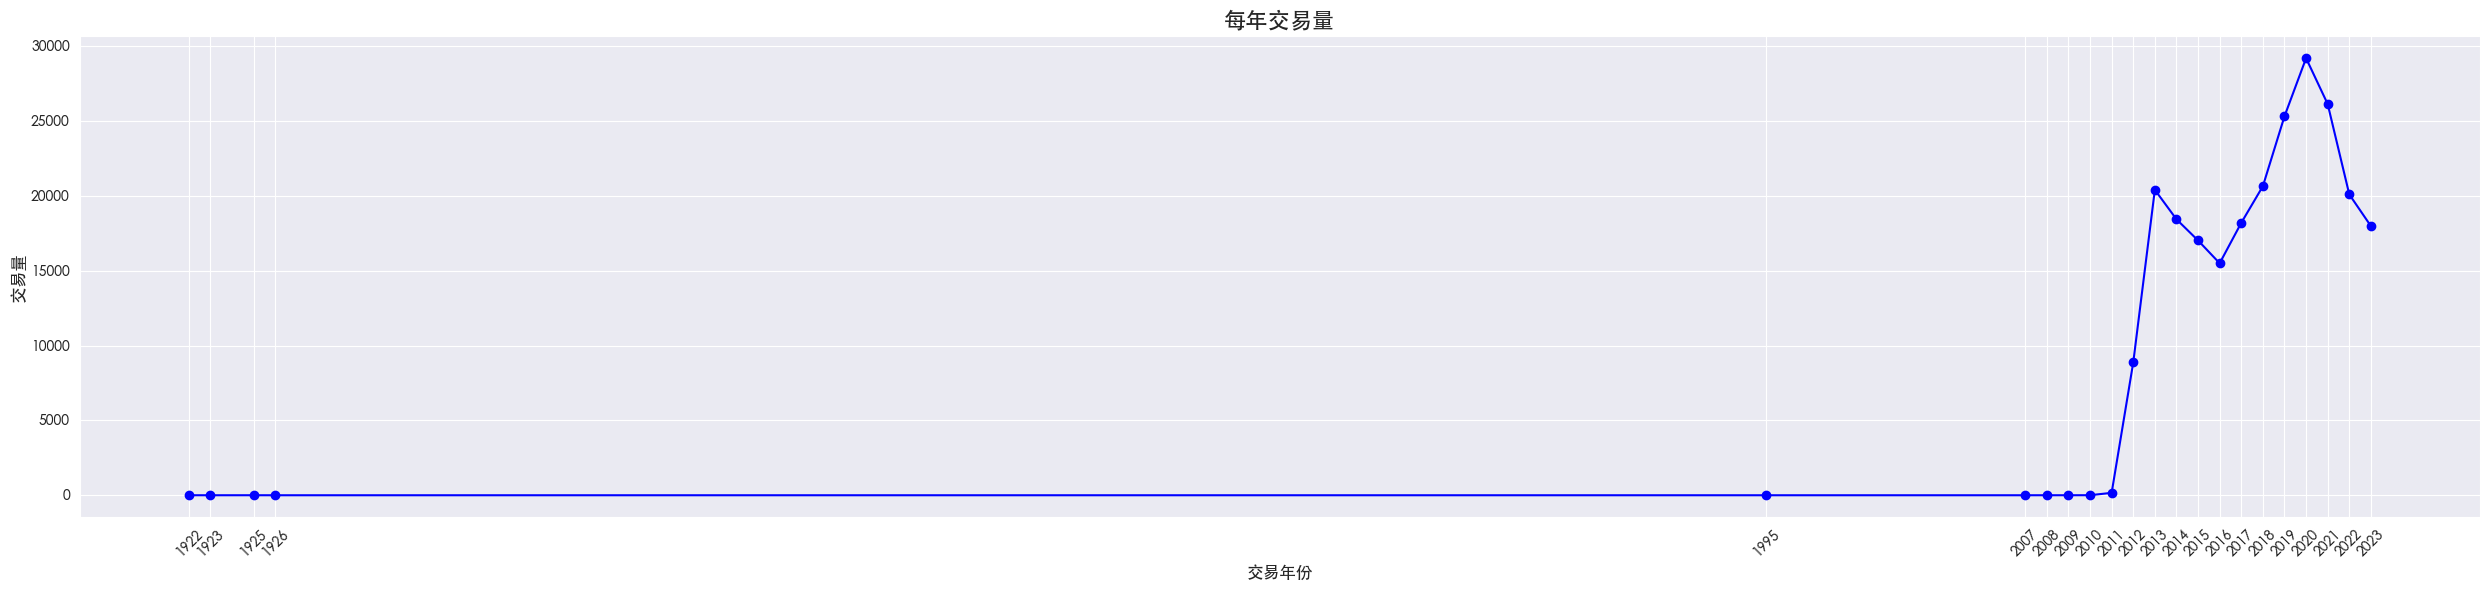

In [5]:
# 假設 df 已經包含數據，先將 '交易年月日' 轉換為 datetime 格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], errors='coerce')

# 提取年份並新增一個欄位 '交易年份'
df['交易年份'] = df['交易年月日'].dt.year

# 根據年份來統計每年的交易量
transactions_per_year = df.groupby('交易年份').size().reset_index(name='交易量')

# 繪製每年的交易量折線圖
plt.figure(figsize=(25, 6))
plt.plot(transactions_per_year['交易年份'], transactions_per_year['交易量'], marker='o', linestyle='-', color='b')
plt.title('每年交易量', fontsize=16)
plt.xlabel('交易年份', fontsize=12)
plt.ylabel('交易量', fontsize=12)
plt.grid(True)

# 設置X軸標籤並旋轉45度
plt.xticks(transactions_per_year['交易年份'], rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()

In [6]:
# 先將 '交易年月日' 欄位轉換為 datetime 格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], errors='coerce')

# 篩選出 2022 年以前的交易
df_before_2022 = df[df['交易年月日'] < '2012-01-01']

# 查看結果
print(df_before_2022[['交易年月日']])

            交易年月日
34536  1926-06-23
34537  2011-05-15
34538  2011-06-14
34539  2011-06-23
34540  2011-05-31
...           ...
211596 2007-09-30
211597 2010-12-30
211598 2010-12-01
230371 2009-09-21
230372 2009-09-21

[178 rows x 1 columns]


In [7]:
# 先將 '交易年月日' 欄位轉換為 datetime 格式
df['交易年月日'] = pd.to_datetime(df['交易年月日'], errors='coerce')

# 篩選出 2022 年以前的交易
df_after_2022 = df[df['交易年月日'] > '2012-01-01']

# 查看結果
print(df_after_2022[['交易年月日']])

            交易年月日
0      2022-09-02
1      2022-08-01
2      2022-08-04
3      2022-08-01
4      2022-08-01
...           ...
238007 2015-11-20
238008 2015-12-09
238009 2015-11-30
238010 2015-11-30
238011 2015-11-25

[237831 rows x 1 columns]


In [8]:
# 直接在原 DataFrame 中刪除 2012 年以前的資料
df = df[df['交易年月日'] >= '2012-01-01']
# df.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_44col_240149row_2012年後.csv',index=False)

In [9]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '電梯', '緯度', '經度', 'bad_count', 'good_count',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯',
       'Region', '交易年份'],
      dtype='object')

In [10]:
# 將所有值轉換為字串類型(原建築完成年月-float64)，然後去除空白字符
df['建築完成年月'] = df['建築完成年月'].astype(str).str.strip()

# 排序 unique 值
column_values = sorted(df['建築完成年月'].unique())
print(column_values)

['0.0', '10000.0', '100000.0', '1000103.0', '1000104.0', '1000105.0', '1000106.0', '1000107.0', '1000110.0', '1000112.0', '1000113.0', '1000114.0', '1000117.0', '1000120.0', '1000121.0', '1000125.0', '1000126.0', '1000127.0', '1000131.0', '1000201.0', '1000210.0', '1000214.0', '1000217.0', '1000221.0', '1000222.0', '1000223.0', '1000224.0', '1000302.0', '1000303.0', '1000307.0', '1000308.0', '1000309.0', '1000310.0', '1000314.0', '1000315.0', '1000316.0', '1000317.0', '1000318.0', '1000321.0', '1000322.0', '1000324.0', '1000325.0', '1000328.0', '1000329.0', '1000330.0', '1000331.0', '1000401.0', '1000407.0', '1000411.0', '1000413.0', '1000414.0', '1000415.0', '1000418.0', '1000421.0', '1000422.0', '1000425.0', '1000426.0', '1000428.0', '1000429.0', '1000502.0', '1000503.0', '1000504.0', '1000505.0', '1000509.0', '1000512.0', '1000513.0', '1000516.0', '1000517.0', '1000518.0', '1000519.0', '1000520.0', '1000524.0', '1000525.0', '1000526.0', '1000527.0', '1000530.0', '1000531.0', '100060

In [11]:
# 提取小數點前的部分，去掉前四位，保留從第五位開始的數字作為「建築完成年」
df['建築完成年'] = df['建築完成年月'].apply(lambda x: str(int(float(x)))[0:-4] if pd.notna(x) and str(x).replace('.0', '').isdigit() else '0')

# 將空字串替換為 '0'
df['建築完成年'] = df['建築完成年'].replace('', '0')

# 將「建築完成年」轉換成整數類型
df['建築完成年'] = df['建築完成年'].astype(int)

# 查看結果
print(df[['建築完成年月', '建築完成年']].head(30))
print(df[['建築完成年']].dtypes)

       建築完成年月  建築完成年
0    840704.0     84
1    640322.0     64
2    890919.0     89
3    650600.0     65
4    510000.0     51
5    810813.0     81
6    850916.0     85
7    960719.0     96
8    820526.0     82
9   1110412.0    111
10   580520.0     58
11   831227.0     83
12  1060124.0    106
13   930521.0     93
14   660830.0     66
15   830518.0     83
16   960719.0     96
17   790102.0     79
18   960920.0     96
19   850813.0     85
20   760327.0     76
21   700507.0     70
22   920916.0     92
23   831128.0     83
24  1091029.0    109
25   790518.0     79
26   960920.0     96
27   721123.0     72
28     6510.0      0
29   841107.0     84
建築完成年    int64
dtype: object


In [12]:
column_values = sorted(df['交易年份'].unique())
# print(column_values)
# 提取年份，並轉換為民國年
df['交易年_民國'] = df['交易年份']- 1911

# 查看結果
print(df[['交易年份', '交易年_民國']].tail(20))

          交易年份  交易年_民國
237992  2015.0   104.0
237993  2015.0   104.0
237994  2015.0   104.0
237995  2015.0   104.0
237996  2015.0   104.0
237997  2015.0   104.0
237998  2015.0   104.0
237999  2015.0   104.0
238000  2015.0   104.0
238001  2015.0   104.0
238002  2015.0   104.0
238003  2015.0   104.0
238004  2015.0   104.0
238005  2015.0   104.0
238006  2015.0   104.0
238007  2015.0   104.0
238008  2015.0   104.0
238009  2015.0   104.0
238010  2015.0   104.0
238011  2015.0   104.0


In [13]:
print(df.columns)

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '電梯', '緯度', '經度', 'bad_count', 'good_count',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯',
       'Region', '交易年份', '建築完成年', '交易年_民國'],
      dtype='object')


In [14]:
df['屋齡'] = df['交易年_民國'] - df['建築完成年']

In [15]:
df['屋齡'].unique()

array([ 27.,  47.,  22.,  46.,  60.,  30.,  26.,  15.,  29.,   0.,  53.,
        28.,   5.,  18.,  45.,  32.,  35.,  41.,  19.,   2.,  39., 111.,
        31.,  54.,  34.,  42.,  44.,  43.,   4.,   1.,  16.,   9.,  36.,
        33.,  25.,  24.,  23.,  14.,   3.,  48.,  11.,  52.,  37.,   7.,
        38.,  40.,   6.,   8.,  61.,  49.,  17.,  21.,  10.,  13.,  51.,
        76.,  12.,  50.,  55.,  56.,  20.,  62., 108.,  88.,  63.,  58.,
        65.,  97.,  87.,  66.,  90.,  71.,  59.,  72.,  69.,  86.,  74.,
        57.,  68.,  81.,  91.,  64.,  70.,  -1.,  -2.,  96.,  -3.,  -4.,
        80.,  79., 105.,  73., 100., 102.,  78.,  95.,  93.,  67., 112.,
        82.,  75.,  99., 107.,  83.,  85.,  92., 103.,  94.,  89.,  -5.,
       106., 104., 101., 109.,  77., 110.,  84.,  -7.,  98.])

In [16]:
# 定義屋齡區間
bins = [-float('inf'), 3, 12, 21, 30, float('inf')]
labels = ['未滿3年', '3年以上－未滿12年', '12年以上－未滿21年', '21年以上－未滿30年', '30年以上']

# 使用 pd.cut() 進行分類並加上標籤
df['屋齡區間'] = pd.cut(df['屋齡'], bins=bins, labels=labels)

# 檢查結果
print(df[['屋齡', '屋齡區間']].head())


     屋齡         屋齡區間
0  27.0  21年以上－未滿30年
1  47.0        30年以上
2  22.0  21年以上－未滿30年
3  46.0        30年以上
4  60.0        30年以上


In [17]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '電梯', '緯度', '經度', 'bad_count', 'good_count',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯',
       'Region', '交易年份', '建築完成年', '交易年_民國', '屋齡', '屋齡區間'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237834 entries, 0 to 238011
Data columns (total 49 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   鄉鎮市區         237815 non-null  object        
 1   土地位置建物門牌     237834 non-null  object        
 2   交易年月日        237834 non-null  datetime64[ns]
 3   建築完成年月       237834 non-null  object        
 4   建物移轉總面積平方公尺  237834 non-null  float64       
 5   有無管理組織       237834 non-null  object        
 6   總價元          237834 non-null  int64         
 7   單價元平方公尺      236230 non-null  float64       
 8   備註           65380 non-null   object        
 9   編號           237834 non-null  object        
 10  電梯           74518 non-null   object        
 11  緯度           237834 non-null  float64       
 12  經度           237834 non-null  float64       
 13  bad_count    237834 non-null  float64       
 14  good_count   237834 non-null  float64       
 15  建築型態清整       237834 non-null  object   

In [19]:
df_columns_cleaned = df.drop(columns=['交易年份', '建築完成年', '交易年_民國'])
df_columns_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237834 entries, 0 to 238011
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   鄉鎮市區         237815 non-null  object        
 1   土地位置建物門牌     237834 non-null  object        
 2   交易年月日        237834 non-null  datetime64[ns]
 3   建築完成年月       237834 non-null  object        
 4   建物移轉總面積平方公尺  237834 non-null  float64       
 5   有無管理組織       237834 non-null  object        
 6   總價元          237834 non-null  int64         
 7   單價元平方公尺      236230 non-null  float64       
 8   備註           65380 non-null   object        
 9   編號           237834 non-null  object        
 10  電梯           74518 non-null   object        
 11  緯度           237834 non-null  float64       
 12  經度           237834 non-null  float64       
 13  bad_count    237834 non-null  float64       
 14  good_count   237834 non-null  float64       
 15  建築型態清整       237834 non-null  object   

In [20]:
df_columns_cleaned.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_237834row_2012年後.csv', index=False)

# unitPrice outliers

In [21]:
df_2 = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_237834row_2012年後.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237834 entries, 0 to 237833
Data columns (total 46 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         237815 non-null  object 
 1   土地位置建物門牌     237834 non-null  object 
 2   交易年月日        237834 non-null  object 
 3   建築完成年月       212559 non-null  float64
 4   建物移轉總面積平方公尺  237834 non-null  float64
 5   有無管理組織       237834 non-null  object 
 6   總價元          237834 non-null  int64  
 7   單價元平方公尺      236230 non-null  float64
 8   備註           65380 non-null   object 
 9   編號           237834 non-null  object 
 10  電梯           74518 non-null   object 
 11  緯度           237834 non-null  float64
 12  經度           237834 non-null  float64
 13  bad_count    237834 non-null  float64
 14  good_count   237834 non-null  float64
 15  建築型態清整       237834 non-null  object 
 16  陽台有無         237834 non-null  int64  
 17  是否含額外土地      237834 non-null  int64  
 18  建築型態_住商大樓    237834 non-

# 單價元平方公尺 有 1604 空缺值

In [23]:
pd.set_option('display.max_rows', None)
df_2.isnull().sum()

鄉鎮市區               19
土地位置建物門牌            0
交易年月日               0
建築完成年月          25275
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺          1604
備註             172454
編號                  0
電梯             163316
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4755
格局比例_廳           4755
格局比例_衛           4755
格局比例_隔間          4755
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km           0
KDE_1km             0
KDE_1.5km           0
有無電梯                0
Region          12132
屋齡                  0
屋齡區間      

In [24]:
df_2.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '電梯', '緯度', '經度', 'bad_count', 'good_count',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯',
       'Region', '屋齡', '屋齡區間'],
      dtype='object')

In [25]:
# 找出 [單價元平方公尺] 為 NaN 或者為 0 的行
mask = (df_2['單價元平方公尺'].isna()) | (df_2['單價元平方公尺'] == 0)

# 計算 [房地總價元] / [建物移轉總面積平方公尺]，針對滿足條件的行進行計算
df_2.loc[mask, '單價元平方公尺'] = df_2.loc[mask, '房地總價元'] / df_2.loc[mask, '建物移轉總面積平方公尺']

# 查看更新後的數據
print(df_2[mask][['房地總價元', '建物移轉總面積平方公尺', '單價元平方公尺']].head())

         房地總價元  建物移轉總面積平方公尺       單價元平方公尺
1133  38130000       629.70  60552.644116
1140  11700000       197.28  59306.569343
1305   9511976       334.47  28438.951176
1791   1800000        82.52  21812.893844
1937  41580000       865.86  48021.620123


In [26]:
df_2.isnull().sum()

鄉鎮市區               19
土地位置建物門牌            0
交易年月日               0
建築完成年月          25275
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172454
編號                  0
電梯             163316
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4755
格局比例_廳           4755
格局比例_衛           4755
格局比例_隔間          4755
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km           0
KDE_1km             0
KDE_1.5km           0
有無電梯                0
Region          12132
屋齡                  0
屋齡區間      

In [27]:
# 換算坪數
conversion_factor = 3.305785

# 將「建物移轉總面積平方公尺」轉換成坪
df_2['建物移轉總面積坪'] = df_2['建物移轉總面積平方公尺'] * conversion_factor
# 將「單價元平方公尺」轉換成「單價元每坪」
df_2['單價元每坪'] = df_2['單價元平方公尺'] * conversion_factor
df_2['房地總價元(坪)'] = df_2['建物移轉總面積坪'] * df_2['單價元每坪']

# 房地總價元(坪)有 2 個空缺值

In [28]:
df_2.isnull().sum()

鄉鎮市區               19
土地位置建物門牌            0
交易年月日               0
建築完成年月          25275
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172454
編號                  0
電梯             163316
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4755
格局比例_廳           4755
格局比例_衛           4755
格局比例_隔間          4755
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km           0
KDE_1km             0
KDE_1.5km           0
有無電梯                0
Region          12132
屋齡                  0
屋齡區間      

In [29]:
# 找出 [單價元每坪] 為 NaN 或者為 0 的行
mask = (df_2['單價元每坪'].isna()) | (df_2['單價元每坪'] == 0)

# 計算 [房地總價元(坪)] / [建物移轉總面積坪]，針對滿足條件的行進行計算
df_2.loc[mask, '單價元每坪'] = df_2.loc[mask, '房地總價元(坪)'] / df_2.loc[mask, '建物移轉總面積坪']

# 查看更新後的數據
print(df_2[mask][['房地總價元(坪)', '建物移轉總面積坪', '單價元每坪']].head())

       房地總價元(坪)    建物移轉總面積坪  單價元每坪
16147       0.0  110.347103    0.0
43279       0.0   96.727269    0.0
45496       0.0   60.198345    0.0
80121       0.0  150.776854    0.0
83484       0.0  129.950408    0.0


In [30]:
df_2.isnull().sum()

鄉鎮市區               19
土地位置建物門牌            0
交易年月日               0
建築完成年月          25275
建物移轉總面積平方公尺         0
有無管理組織              0
總價元                 0
單價元平方公尺             0
備註             172454
編號                  0
電梯             163316
緯度                  0
經度                  0
bad_count           0
good_count          0
建築型態清整              0
陽台有無                0
是否含額外土地             0
建築型態_住商大樓           0
建築型態_公寓             0
建築型態_其他             0
建築型態_透天厝            0
房地總價元               0
格局比例_房           4755
格局比例_廳           4755
格局比例_衛           4755
格局比例_隔間          4755
是否包含車位              0
建材_磚石               0
建材_鋼筋               0
建材_鋼骨               0
建材_竹木               0
住                   0
商                   0
工                   0
農                   0
移轉層次_騎樓             0
移轉層次_屋頂             0
移轉層次_一二樓            0
KDE_0.5km           0
KDE_1km             0
KDE_1.5km           0
有無電梯                0
Region          12132
屋齡                  0
屋齡區間      

In [31]:
# 找出「房地總價元每坪」為 0 或 NaN 的行
mask = (df_2['房地總價元(坪)'].isna()) | (df_2['房地總價元(坪)'] == 0)
# 查看這些行
result = df_2[mask]

# 查看結果
print(result.head())

      鄉鎮市區                          土地位置建物門牌       交易年月日  建築完成年月  建物移轉總面積平方公尺  \
16147  善化區        臺南市善化區公園路２５３號二樓之１等９４戶之公共設施  2019-08-01     NaN        33.38   
43279  安南區  臺南市安南區北安路三段５０６號９樓之１停車位編號:地下一層２０號  2018-05-24     NaN        29.26   
45496  歸仁區         臺南市歸仁區歸仁里忠孝北路２２２號二樓之１等３５戶  2018-03-23     NaN        18.21   
80121   北區             臺南市北區公園南路370巷17號之共有部分  2014-01-21     NaN        45.61   
83484   北區             臺南市北區公園南路370巷17號之共有部分  2014-03-25     NaN        39.31   

      有無管理組織      總價元  單價元平方公尺                       備註                   編號  \
16147      有  1100000      0.0                 單獨車位交易。；  RPTNMLMJRHOFFHD09CA   
43279      有   750000      0.0                      NaN  RPROMLSLOHNFFBD78CA   
45496      有   800000      0.0                 單獨車位交易。；  RPUNMLLMPHNFFID56CA   
80121      有   200000      0.0  單獨車位交易，1車位土地持分1/100000。  RPOOMLKLKHJFFAD76CA   
83484      有   300000      0.0   單獨車位交易。1車位土地持分1/100000  RPTNMLKKMHJFFAD27CA   

       ... KDE_0.5km   KDE_1km  

# 鄉鎮市區空缺值

In [32]:
df_2['鄉鎮市區'].isna().sum()

19

In [33]:
# 篩選出 '鄉鎮市區' 為 NaN 的 '土地位置建物門牌' 欄位
nan_town_area = df_2[df_2['鄉鎮市區'].isna()][['鄉鎮市區','土地位置建物門牌']]

# 顯示結果
print(nan_town_area)

       鄉鎮市區               土地位置建物門牌
203843  NaN  臺南市官田區隆本里和平街二段26巷1弄3號
218644  NaN               臺南市東區平實路
218646  NaN               臺南市東區平實路
218648  NaN               臺南市東區平實路
218652  NaN               臺南市東區平實路
218653  NaN               臺南市東區平實路
218656  NaN               臺南市東區平實路
218798  NaN               臺南市東區平實路
218941  NaN               臺南市東區平實路
218942  NaN               臺南市東區平實路
218943  NaN               臺南市東區平實路
218944  NaN               臺南市東區平實路
218945  NaN               臺南市東區平實路
218946  NaN               臺南市東區平實路
218947  NaN               臺南市東區平實路
218948  NaN               臺南市東區平實路
218949  NaN               臺南市東區平實路
218950  NaN               臺南市東區平實路
218951  NaN               臺南市東區平實路


In [34]:
import re

# 定義一個函數來從 '土地位置建物門牌' 中提取 '市' 後面的區域
def extract_district(address):
    match = re.search(r'市(.+?區)', address)
    if match:
        return match.group(1)
    return None

# 將 '鄉鎮市區' 欄位為 NaN 的行補充 '土地位置建物門牌' 中的區域名稱
df_2.loc[df_2['鄉鎮市區'].isna(), '鄉鎮市區'] = df_2['土地位置建物門牌'].apply(extract_district)

# 檢查結果
print(df_2[['鄉鎮市區', '土地位置建物門牌']].head())


  鄉鎮市區               土地位置建物門牌
0  中西區  臺南市中西區金華路三段２１８號十五樓之１７
1   北區     臺南市北區南園街１２７巷１５１弄３號
2  佳里區        臺南市佳里區麻興路二段５３１號
3  新化區       臺南市新化區中正路６６２巷２２號
4  中西區        臺南市中西區南寧街１３６巷９號


In [35]:
df_2['鄉鎮市區'].isna().sum()

0

In [36]:
df_2.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '電梯', '緯度', '經度', 'bad_count', 'good_count',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯',
       'Region', '屋齡', '屋齡區間', '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)'],
      dtype='object')

In [37]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound = df_2['單價元每坪'].quantile(0.025)
upper_bound = df_2['單價元每坪'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent = df_2[df_2['單價元每坪'] <= lower_bound]

# 篩選出後 2.5% 的資料
upper_2_5_percent = df_2[df_2['單價元每坪'] >= upper_bound]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent)}")

前 2.5% 的資料數量: 5949
後 2.5% 的資料數量: 5946


In [38]:
# 篩選出極端值
outliers_unitPrice = df_2[(df_2['單價元每坪'] < lower_bound) | (df_2['單價元每坪'] > upper_bound)]
# # 將 '房地總價元(坪)' 除以 10000，轉換成每坪萬元
# outliers_unitPrice['單價元每坪(萬)'] = outliers_unitPrice['單價元每坪'] / 10000
print(f"極端值數量: {len(outliers_unitPrice)}")

極端值數量: 11890


In [39]:
df_2.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '電梯', '緯度', '經度', 'bad_count', 'good_count',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯',
       'Region', '屋齡', '屋齡區間', '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)'],
      dtype='object')

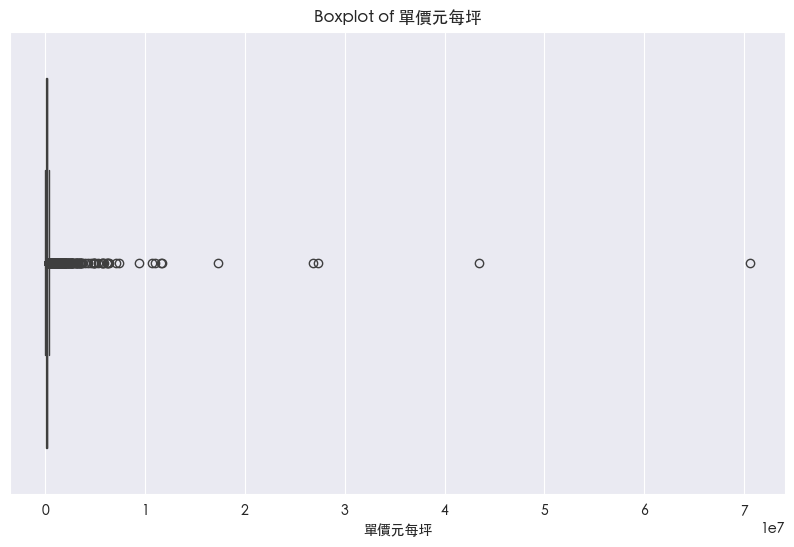

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

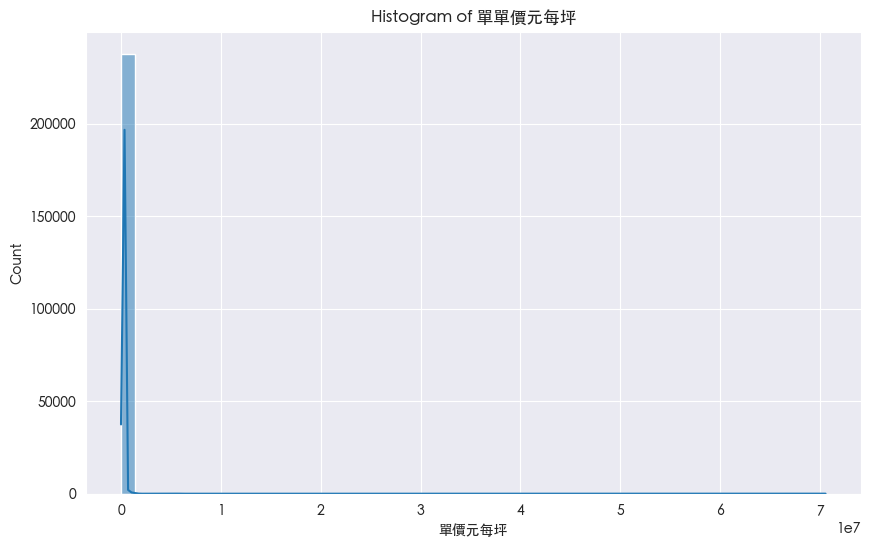

In [41]:

plt.figure(figsize=(10, 6))
sns.histplot(df_2['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單單價元每坪')
plt.show()

In [42]:
df_2_cleaned_unitPrice = df_2.drop(outliers_unitPrice.index)

In [43]:
df_2_cleaned_unitPrice.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '電梯', '緯度', '經度', 'bad_count', 'good_count',
       '建築型態清整', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯',
       'Region', '屋齡', '屋齡區間', '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)'],
      dtype='object')

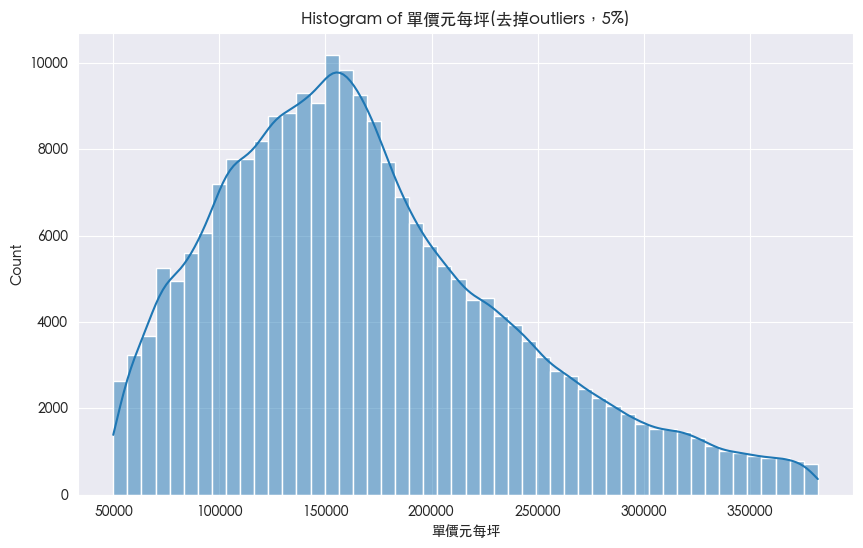

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df_2_cleaned_unitPrice['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉outliers，5%)')
plt.show()

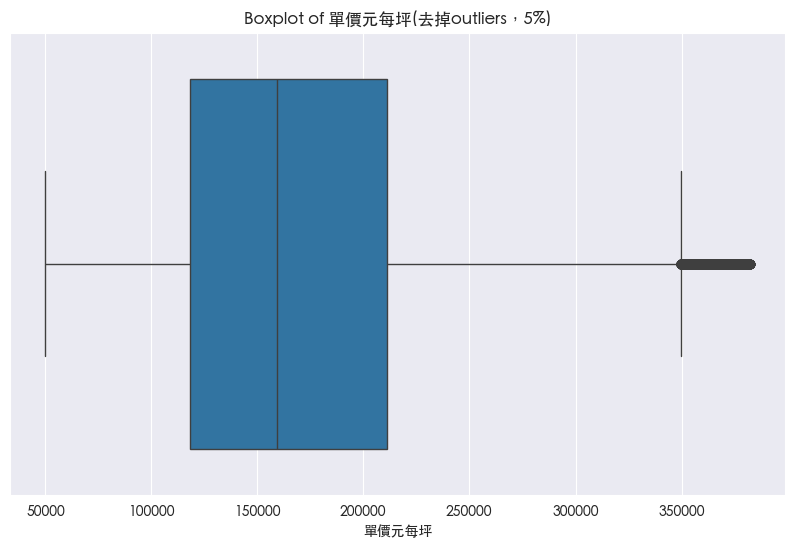

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2_cleaned_unitPrice['單價元每坪'])
plt.title('Boxplot of 單價元每坪(去掉outliers，5%)')
plt.show()

In [46]:
df_2_cleaned_unitPrice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225944 entries, 0 to 237833
Data columns (total 49 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         225944 non-null  object 
 1   土地位置建物門牌     225944 non-null  object 
 2   交易年月日        225944 non-null  object 
 3   建築完成年月       203919 non-null  float64
 4   建物移轉總面積平方公尺  225944 non-null  float64
 5   有無管理組織       225944 non-null  object 
 6   總價元          225944 non-null  int64  
 7   單價元平方公尺      225944 non-null  float64
 8   備註           61341 non-null   object 
 9   編號           225944 non-null  object 
 10  電梯           71945 non-null   object 
 11  緯度           225944 non-null  float64
 12  經度           225944 non-null  float64
 13  bad_count    225944 non-null  float64
 14  good_count   225944 non-null  float64
 15  建築型態清整       225944 non-null  object 
 16  陽台有無         225944 non-null  int64  
 17  是否含額外土地      225944 non-null  int64  
 18  建築型態_住商大樓    225944 non-null 

In [47]:
df_2_cleaned_unitPrice.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_229726row_2012年後_去除outliers_unitPrice_5%.csv',index=False)